In [3]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv("HousingData.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [9]:
print("The shape of the data is: ")
data.shape

The shape of the data is: 


(506, 14)

In [11]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [13]:
X = data.iloc[:,0:13]
y = data.iloc[:,-1]

#X selects all rows and the first 13 columns (index 0 to 12) → typically your features (independent variables).

#y selects the last column (index -1) → typically your target/label (dependent variable).

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

#Parameters:
#X, y:

#X = features (independent variables)

#y = target/label (dependent variable)

#test_size=0.20:

#20% of the data will be used for testing,

#80% for training.

#random_state=42:

#Ensures reproducibility — the split will be the same every time you run the code.

#Any integer can be used (42 is a common convention).

# Why it's used:
#This is essential in machine learning to:

#Train your model on one part of the data (X_train, y_train),

#Test its performance on unseen data (X_test, y_test).

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(X_train, y_train)

#What is a Pipeline in sklearn?
#A pipeline in sklearn is a way to streamline and automate the process of applying multiple steps in sequence, such as:

#Data Preprocessing (e.g., scaling, transforming),

#Model Training (e.g., linear regression, decision tree),

#Prediction.

#By combining these steps into a single pipeline, you can ensure that the operations are applied in the right order, 
#and avoid errors like fitting transformers to the entire dataset instead of just the training data.

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [25]:
model.score(X_test,y_test)

0.668759493535632

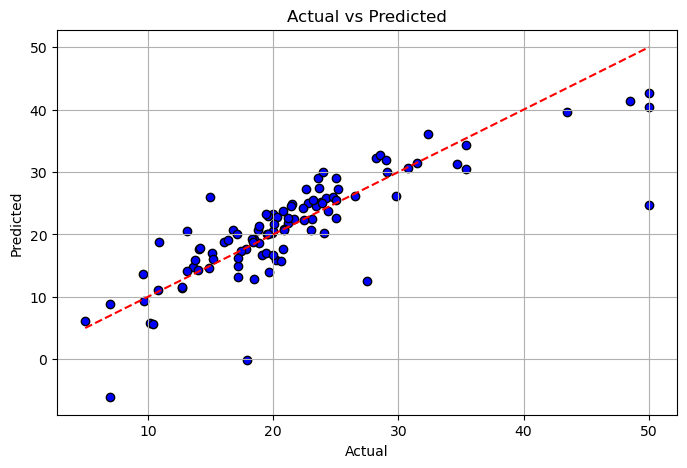

In [29]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()



#This code visualizes how well your model's predictions match the actual values. 
#The blue dots show the predicted values versus the actual values, 
#and the red dashed line shows where the predicted values would lie if they were perfect.

#If the blue dots are close to the red line, your model is doing a good job.

#If they are scattered far from the red line, it means the model’s predictions are not accurate.